# Enrique Ricardo Pablo Buendia Lozada
### Aplicación para el cálculo de la Frecuencia Cardiaca Máxima Variable y Frecuencia cardiaca de reposo variable
### v1/2020

# Requisitos iniciales

### Instalar ANACONDA de https://www.anaconda.com/distribution/
### Instalar R de https://cran.r-project.org/
### Sino esta Jupyter instalar de https://jupyter.readthedocs.io/en/latest/install.html
### Istalar el kernel de R abrir anaconda prompt y dentro ejecutar conda install -c r r-irkernel

#### 1> Leer información FC reposo y buscar comportamiento mayoritario

In [1]:
# Leer el archivo de mediciones en REPOSO
######################################################
datam<-read.csv(file.choose(),head=TRUE,sep=";")      #### leer el archivo data1.csv     FC en reposo (todas)
attach(datam)

In [2]:
head(datam)

,h1,fcrep,h2,fc1,h3,fc2,h4,fc3,h5,fc4,peso,est,edad
,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>
1,7:00:00 a.m.,54,3:05:00 p.m.,66,3:25:00 p.m.,72,3:45:00 p.m.,72,4:05:00 p.m.,66,59.5,1.62,21
2,5:00:00 a.m.,83,3:00:00 p.m.,84,3:20:00 p.m.,80,3:40:00 p.m.,85,4:00:00 p.m.,79,78.0,1.54,20
3,9:40:00 a.m.,54,3:05:00 a.m.,60,3:20:00 a.m.,60,3:40:00 a.m.,66,4:00:00 a.m.,60,NA,NA,NA
4,8:30:00 a.m.,60,3:26:00 a.m.,84,3:49:00 a.m.,90,4:25:00 a.m.,78,4:48:00 a.m.,79,63.0,155.00,20
5,7:00:00 a.m.,66,1:30:00 p.m.,72,1:50:00 p.m.,72,2:10:00 p.m.,72,2:30:00 p.m.,72,NA,NA,NA
6,6:00:00 a.m.,72,1:00:00 p.m.,105,1:25:00 p.m.,72,1:45:00 p.m.,86,2:05:00 p.m.,92,NA,NA,NA


In [3]:
x<-datam$fcrep
x<-x[!is.na(x)]    #### borrar los NA del vector frep

In [4]:
head(datam)

,h1,fcrep,h2,fc1,h3,fc2,h4,fc3,h5,fc4,peso,est,edad
,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>
1,7:00:00 a.m.,54,3:05:00 p.m.,66,3:25:00 p.m.,72,3:45:00 p.m.,72,4:05:00 p.m.,66,59.5,1.62,21
2,5:00:00 a.m.,83,3:00:00 p.m.,84,3:20:00 p.m.,80,3:40:00 p.m.,85,4:00:00 p.m.,79,78.0,1.54,20
3,9:40:00 a.m.,54,3:05:00 a.m.,60,3:20:00 a.m.,60,3:40:00 a.m.,66,4:00:00 a.m.,60,NA,NA,NA
4,8:30:00 a.m.,60,3:26:00 a.m.,84,3:49:00 a.m.,90,4:25:00 a.m.,78,4:48:00 a.m.,79,63.0,155.00,20
5,7:00:00 a.m.,66,1:30:00 p.m.,72,1:50:00 p.m.,72,2:10:00 p.m.,72,2:30:00 p.m.,72,NA,NA,NA
6,6:00:00 a.m.,72,1:00:00 p.m.,105,1:25:00 p.m.,72,1:45:00 p.m.,86,2:05:00 p.m.,92,NA,NA,NA


In [5]:
t1<-table(x, cut(x,breaks=quantile(x, probs=seq(0,1, by=0.25), na.rm=TRUE),include.lowest=TRUE))
## cuartiles de la muestra
print(t1)

    
x    [36,52.8] (52.8,55] (55,60] (60,83]
  36         2         0       0       0
  41         2         0       0       0
  42        16         0       0       0
  44         4         0       0       0
  45         1         0       0       0
  46         1         0       0       0
  48        31         0       0       0
  50         4         0       0       0
  52         4         0       0       0
  53         0         4       0       0
  54         0        49       0       0
  55         0        13       0       0
  56         0         0      16       0
  57         0         0       8       0
  58         0         0      11       0
  59         0         0       1       0
  60         0         0      30       0
  61         0         0       0       2
  62         0         0       0       2
  63         0         0       0       1
  64         0         0       0       3
  65         0         0       0       4
  66         0         0       0      31
  68       

In [6]:
## suma de frecuencias por cuartiles
print(apply(t1,2,sum))

[36,52.8] (52.8,55]   (55,60]   (60,83] 
       65        66        66        63 


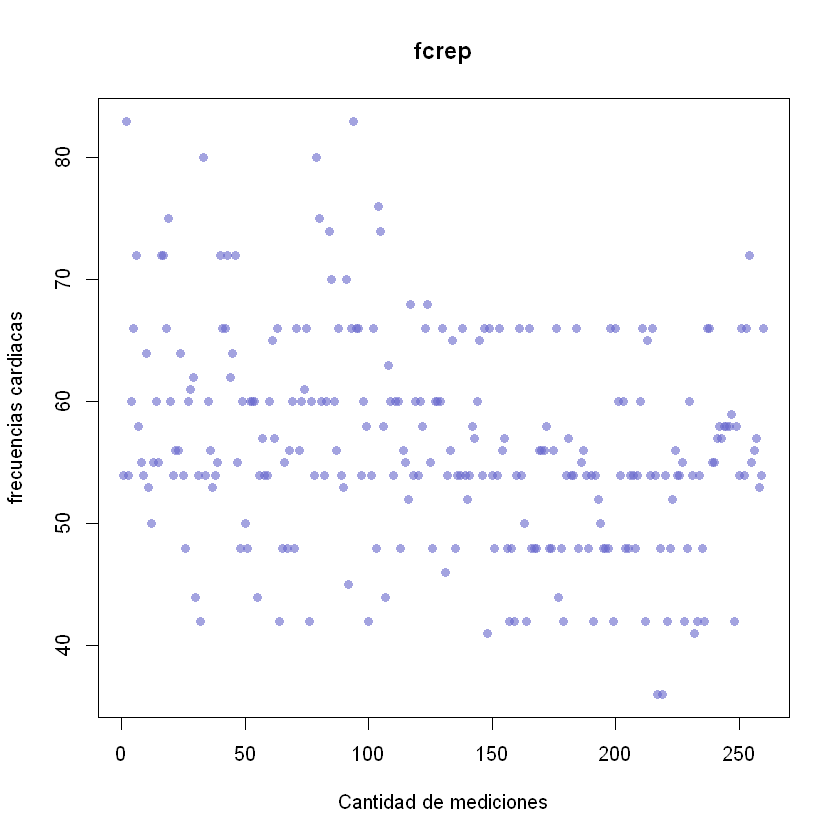

In [7]:
## diagrama de dispersión de los datos en reposo
plot(x,main="fcrep",xlab="Cantidad de mediciones",ylab="frecuencias cardiacas",col=rgb(0.4,0.4,0.8,0.6),pch=16 , cex=1)

In [8]:
###########################################################################################################

library(factoextra)
library(NbClust)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Warning message in max(DiffLev[, 5], na.rm = TRUE):
"ningun argumento finito para max; retornando -Inf"


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


Warning message in matrix(c(results), nrow = 2, ncol = 26):
"la longitud de los datos [51] no es un submúltiplo o múltiplo del número de filas [2] en la matriz"
Warning message in matrix(c(results), nrow = 2, ncol = 26, dimnames = list(c("Number_clusters", :
"la longitud de los datos [51] no es un submúltiplo o múltiplo del número de filas [2] en la matriz"


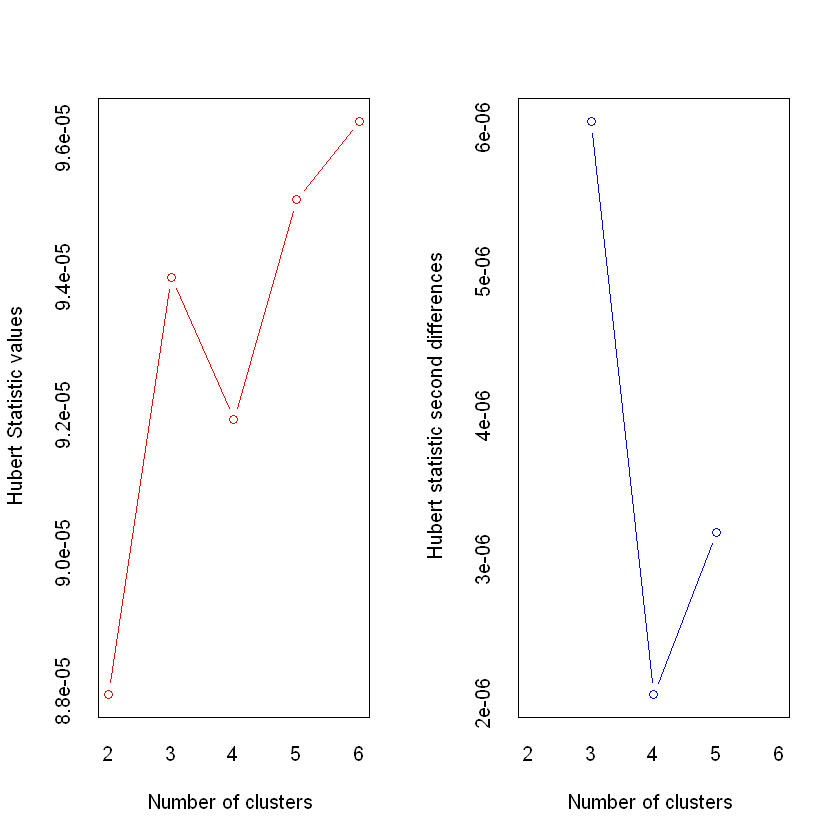

******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


$All.index
      KL       CH Hartigan     CCC    Scott  Marriot TrCovW    TraceW Friedman
2 0.9513  86.8118  89.8730 45.7767 1105.096 48458.60     NA 12114.650  69.1313
3 2.4363 103.0616 289.8354 33.4749 1241.866 64431.54     NA  7159.060 117.6770
4 4.6005 241.8608 161.8824 36.7437 1507.266 41272.53     NA  2579.533 328.3681
5 0.1181 335.2575  11.3966 31.6395 1537.282 57457.08     NA  2298.283 368.6742
6 1.1833 281.3645 196.1584 27.1590 1546.376 79894.08     NA  2219.280 381.8341
     Rubin Cindex     DB Silhouette   Duda Pseudot2  Beale Ratkowsky      Ball
2  70.1313 0.2614 0.5975     0.5246 0.5780 173.7764 0.2424    0.3548 7006.0000
3 118.6770 0.3458 0.5557     0.4256 0.3136 463.9553 0.7261    0.3852 3464.0000
4 329.3681 0.2215 0.6155     0.5389 0.2440  55.7851 0.9787    0.4299 1221.0000
5 369.6742 0.3290 0.5558     0.5251 0.3128  52.7298 0.7031    0.4099  598.4000
6 382.8341 0.3641 0.4837     0.5179 0.1108 730.1705 2.6455    0.3757  477.3333
  Ptbiserial   Frey McClain   Dunn Hubert SDindex Dindex   SDbw
2     0.5186 1.4281  0.0689 0.0667  1e-04  0.2931 5.2833 0.8933
3     0.6418 1.3063  0.1666 0.1111  1e-04  0.2599 4.1500 0.7542
4     0.6096 0.3150  0.4647 0.0667  1e-04  0.3327 2.6919 0.4116
5     0.6103 1.0599  0.4644 0.1000  1e-04  0.3156 2.5563 0.9834
6     0.6097 0.8352  0.4659 0.1111  1e-04  0.4264 2.5331 0.3636

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2         0.2362           769.4517       0.6230
3         0.2287           714.8268       0.3951
4        -0.0770          -251.6212       0.3356
5        -0.0229         -1072.0019       0.4100
6         0.1591           480.8357       0.1073

$Best.nc
                    KL       CH Hartigan     CCC    Scott  Marriot TrCovW
Number_clusters 4.0000   5.0000   3.0000  2.0000   4.0000     4.00   -Inf
Value_Index     4.6005 335.2575 199.9624 45.7767 265.4003 39343.56      4
                  TraceW Friedman    Rubin Cindex     DB Silhouette  Duda
Number_clusters 4298.276 210.6911 -170.385 0.2215 0.4837     0.5389 0.578
Value_Index        4.000   4.0000    4.000 6.0000 4.0000     2.0000 2.000
                PseudoT2  Beale Ratkowsky Ball PtBiserial   Frey McClain   Dunn
Number_clusters 173.7764 0.2424    0.4299 3542     0.6418 1.3063  0.0689 0.1111
Value_Index       2.0000 4.0000    3.0000    3     3.0000 2.0000  3.0000 0.0000
                Hubert SDindex Dindex   SDbw
Number_clusters      0  0.2599      0 0.3636
Value_Index          3  0.0000      6 4.0000

$Best.partition
  [1] 1 2 1 3 3 2 3 1 1 3 1 1 1 3 1 2 2 3 2 3 1 1 1 3 1 1 3 3 3 4 1 4 2 1 3 1 1
 [38] 1 1 2 3 3 2 3 3 2 1 1 3 1 1 3 3 3 4 1 3 1 1 3 3 3 3 4 1 1 1 1 3 1 3 1 3 3
 [75] 3 4 3 1 2 2 3 1 3 2 2 3 1 3 1 1 2 4 3 2 3 3 1 3 3 4 1 3 1 2 2 3 4 3 3 1 3
[112] 3 1 1 1 1 2 1 3 1 3 3 3 2 1 1 3 3 3 3 4 1 1 3 1 1 1 3 1 1 1 3 3 3 3 1 3 4
[149] 3 1 1 1 3 1 3 1 4 1 4 1 3 1 1 4 3 1 1 1 1 1 1 3 1 1 1 3 4 1 4 1 3 1 1 3 1
[186] 1 1 1 1 1 4 1 1 1 1 1 1 3 4 3 3 1 3 1 1 1 1 1 1 3 3 4 3 1 3 1 4 1 4 1 4 1
[223] 1 1 1 1 1 4 1 3 1 4 4 1 1 4 3 3 1 1 3 3 3 3 3 3 3 4 3 1 3 1 3 2 1 1 3 1 1
[260] 3

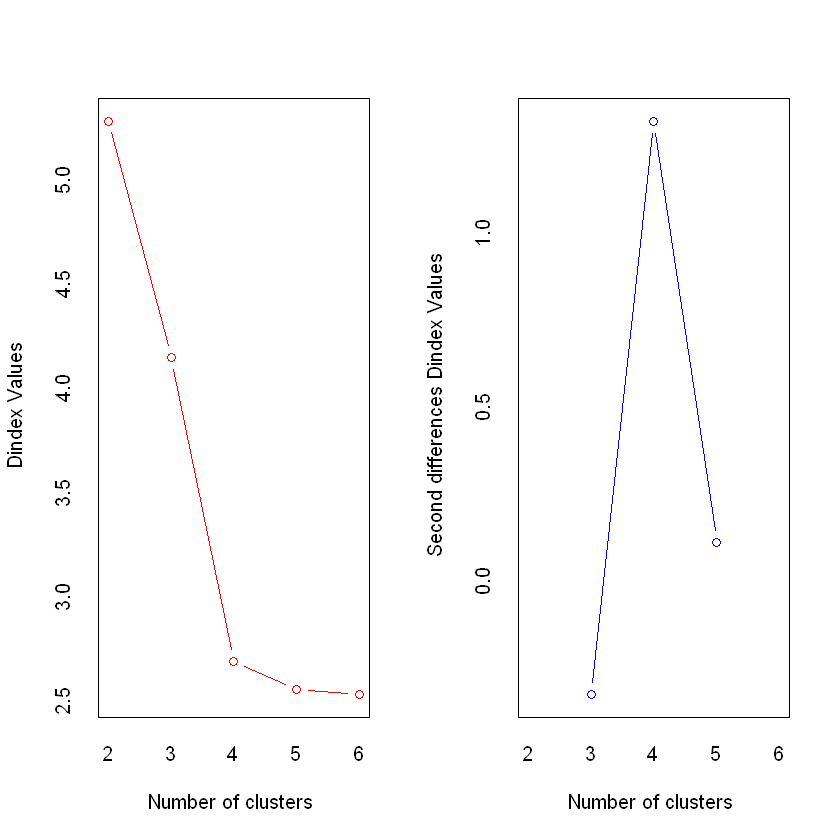

In [9]:
###https://www.rdocumentation.org/packages/NbClust/versions/1.0/topics/NbClust
NbClust(x, distance = "euclidean", min.nc=2, max.nc=6, method = "complete", index = "all", alphaBeale = 0.1)

###########################################################################################################

In [10]:
# de lo que se observa en la gráfica 4 es el numero de cluster adecuado (puntos de quiebre)

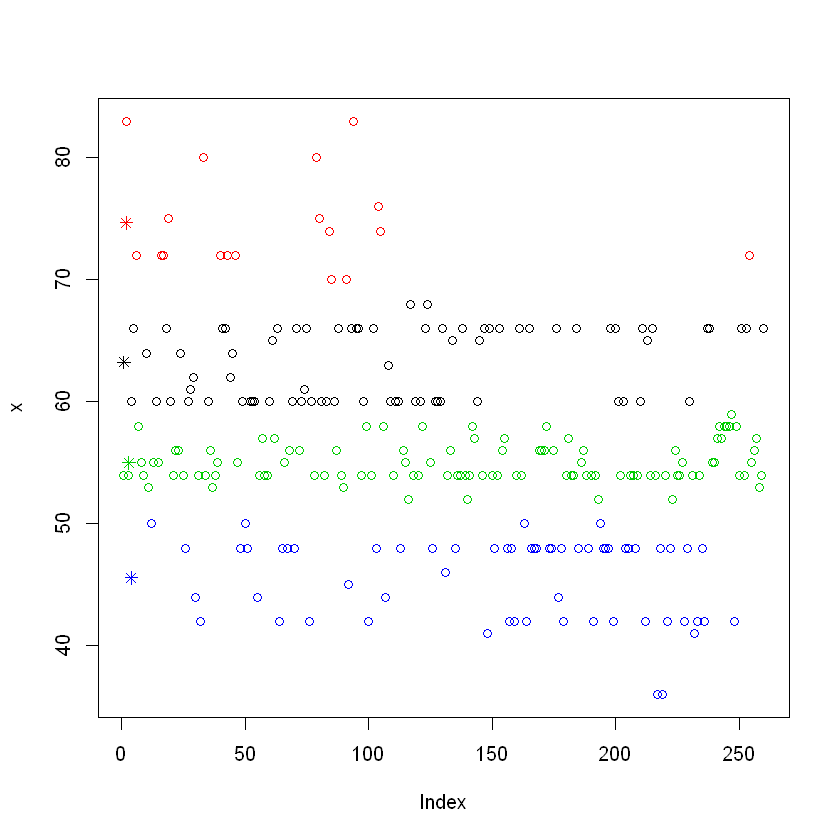

In [11]:
### Clusteres      1

#### usando clusters
library(stats)
cl<-kmeans(x,4,nstart=25)           # método kmeans para crear los clusters (machine learning, aprendizaje no supervisado)
plot(x,col=cl$cluster)
points(cl$centers,col=1:5,pch=8)    # marcar los centros de los clusters con una estrellita
                                    # colorear cada cluster

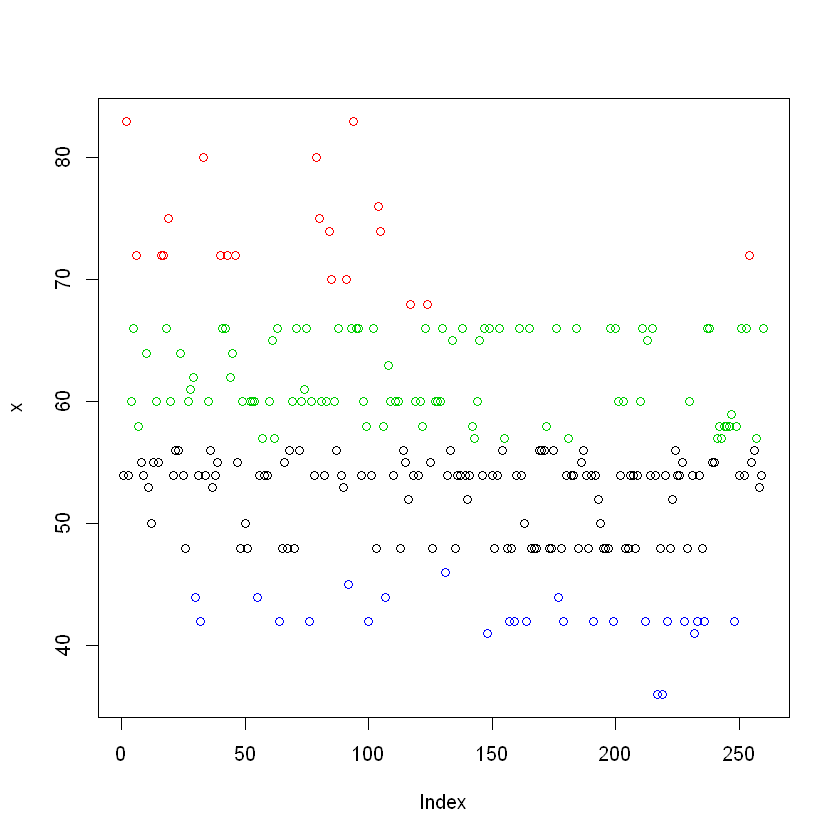

In [12]:
### Clusteres      2

#### usando clusters

cl<-NbClust(x, distance = "minkowski", min.nc = 4, max.nc = 6,method = "complete", index = "duda")
plot(x,col=cl$Best.partition)

#####################################################################################################

In [13]:
ag<-c()
d<-cbind(x,cl$Best.partition)
# de esta gráfica se nota que el promedio mas incluyennte esta en los colores negro y verde
# de ahi que se tomen como referencia generica de las mediciones, corresponden en este caso a los clusters 1 y 3
ag<-c()
for (i in 1:length(x)){
    if(d[i,2]==1) ag=c(ag,d[i,1])
}
cat("Cluster 1 min > ",min(ag)," max > ",max(ag),"\n")

#plot(ag,ylim=c(0,100),col = rgb(red = 0, green = 0, blue = 1, alpha = 0.5),pch = 16)
ag<-c()
for (i in 1:length(x)){
    if(d[i,2]==2) ag=c(ag,d[i,1])
}
cat("Cluster 2 min > ",min(ag)," max > ",max(ag),"\n")
#points(ag,col = rgb(red = 0, green = 1, blue = 0, alpha = 0.5),pch = 16)
ag<-c()
for (i in 1:length(x)){
    if(d[i,2]==3) ag=c(ag,d[i,1])
}
cat("Cluster 3 min > ",min(ag)," max > ",max(ag),"\n")
#points(ag,col = rgb(red = 1, green = 0, blue = 0, alpha = 0.5),pch = 16)
ag<-c()
for (i in 1:length(x)){
    if(d[i,2]==4) ag=c(ag,d[i,1])
}
cat("Cluster 4 min > ",min(ag)," max > ",max(ag),"\n")
#points(ag,col = rgb(red = 1, green = 0.3, blue = 0.5, alpha = 0.5),pch = 16)

Cluster 1 min >  48  max >  56 
Cluster 2 min >  68  max >  83 
Cluster 3 min >  57  max >  66 
Cluster 4 min >  36  max >  46 


In [14]:
##### Tomar los clusters centrales, con mas información en promedio : cluster 1 y 3.
               
### separar los grupos (clusteres)
ag<-c()
d<-cbind(x,cl$Best.partition)
for (i in 1:length(x)){
    if(d[i,2]==1 || d[i,2]==3) ag=c(ag,d[i,1])         # 1 cluster  d[i,2]==1 
    }
summary(ag)      # identificar caracteristicas de estos dos clusters
ls<-max(ag)
li<-min(ag)

cat("Cortes en : ",li,"  ",ls,"\n")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.00   54.00   56.00   56.66   60.00   66.00 

Cortes en :  48    66 


#### 2> Validar las mediciones recopiladas y crear diseño correcto de mediciones

In [15]:
####################################################################################################

### validar información
x<-datam$fcrep
print(x)
cat("Tamaño inicial de muestra : ",length(x),"\n")
x<-x[!is.na(x)]
ttt<-length(x)
cat("Tamaño de la muestra : ",ttt,"\n")
#fcr<-sample(x,ttt,replace=TRUE)
fcr<-x
print(fcr)


  [1] 54 83 54 60 66 72 58 55 54 64 NA 53 50 55 60 55 72 72 66 75 NA 60 54 56 56
 [26] 64 54 48 60 61 62 44 54 42 80 54 60 56 53 54 55 72 66 66 72 62 64 72 55 48
 [51] 60 50 48 60 60 60 44 54 57 NA 54 54 60 65 57 66 42 48 55 48 56 60 48 66 56
 [76] 60 61 66 42 60 54 80 75 60 54 60 74 70 60 56 66 54 53 70 45 66 83 66 66 54
[101] 60 58 42 54 66 48 76 74 58 44 63 60 54 60 60 48 56 55 52 68 54 60 54 60 58
[126] 66 68 55 48 60 60 60 66 46 54 56 65 48 54 54 66 54 52 54 58 57 60 NA 65 54
[151] 66 41 66 54 48 54 66 56 57 48 42 48 42 54 66 54 50 42 66 48 48 48 56 56 56
[176] 58 48 48 56 66 44 48 42 54 57 54 54 66 48 55 56 54 48 54 42 54 52 50 48 48
[201] 48 66 42 66 60 54 60 48 48 54 54 48 54 60 66 42 65 54 66 54 36 48 36 54 42
[226] 48 52 56 54 54 55 42 48 60 54 41 42 54 48 42 66 66 55 55 57 58 57 58 58 58
[251] 59 42 58 54 66 54 66 72 55 56 57 53 54 66
Tamaño inicial de muestra :  264 
Tamaño de la muestra :  260 
  [1] 54 83 54 60 66 72 58 55 54 64 53 50 55 60 55 72 72 66 75 60 54 56 56 64 5

In [16]:
### hacer todos los vectores (variables) del mismo tamaño  y válidos

print(peso)                        # peso vector original
x<-peso
x<-x[!is.na(x)]                    # quitar valores faltantes
tw<-ttt-length(x)
falta<-sample(x,tw,replace=TRUE)   # las muestras se rellenan con datos de la misma muestra para alinearlos
pesoa<-c(x,falta)
print(pesoa)                       # peso vector validado



print(est)
x<-est
x<-x[!is.na(x)]
### cm a m
for (i in 1:length(x)){
   if(x[i]>=100){
       x[i]=x[i]/100
   }
}
tw<-ttt-length(x)
falta<-sample(x,tw,replace=TRUE)
estaturaa<-c(x,falta)
print(estaturaa)


print(edad)
x<-edad
x<-x[!is.na(x)]
tw<-ttt-length(x)
falta<-sample(x,tw,replace=TRUE)
edada<-c(x,falta)
print(edada)


print(fc1)
x<-fc1
x<-x[!is.na(x)]
tw<-ttt-length(x)
falta<-sample(x,tw,replace=TRUE)
fcc1<-c(x,falta)
print(fcc1)

print(fc2)
x<-fc2
x<-x[!is.na(x)]
tw<-ttt-length(x)
falta<-sample(x,tw,replace=TRUE)
fcc2<-c(x,falta)
print(fcc2)

print(fc3)
x<-fc3
x<-x[!is.na(x)]
tw<-ttt-length(x)
falta<-sample(x,tw,replace=TRUE)
fcc3<-c(x,falta)
print(fcc3)

print(fc4)
x<-fc4
x<-x[!is.na(x)]
tw<-ttt-length(x)
falta<-sample(x,tw,replace=TRUE)
fcc4<-c(x,falta)
print(fcc4)

  [1] 59.5 78.0   NA 63.0   NA   NA   NA 67.0 59.0 69.0   NA   NA   NA   NA   NA
 [16]   NA 69.0 69.0 60.0 77.0 95.0 57.0 72.4   NA   NA   NA 72.0 99.0   NA   NA
 [31]   NA 50.0 59.5   NA 78.0   NA   NA   NA   NA 59.0 60.0   NA 60.0 59.0   NA
 [46] 67.0   NA 84.0   NA   NA 77.0 60.0 99.0   NA 72.4 59.5 50.0   NA   NA 68.0
 [61] 59.0   NA   NA 86.0 60.0 72.4 84.0 95.0   NA 99.0   NA   NA 60.0 60.0   NA
 [76] 72.0   NA   NA   NA 84.0   NA 78.0 78.0   NA   NA   NA   NA   NA 59.5   NA
 [91] 59.0 59.0   NA 85.0 50.0   NA   NA 59.0 77.0 66.0   NA   NA   NA 59.5 59.0
[106] 99.0 85.0 85.0   NA 50.0 86.0   NA 59.0 59.0   NA 95.0   NA 63.0 99.0   NA
[121] 66.0 84.0 72.4 77.0 67.0   NA   NA   NA   NA 85.0 85.0 59.0 60.0 50.0   NA
[136]   NA 86.0 95.0 60.0 59.0 90.0 72.4 99.0 66.0   NA   NA   NA   NA   NA 59.5
[151] 60.0 50.0   NA 59.0 99.0   NA   NA   NA   NA 95.0   NA 72.0 50.0 59.0 59.0
[166] 66.0 99.0   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
[181] 50.0 95.0   NA 59.0 66

  [1]  66  84  60  84  72 105  68  84  84  68  78  66  69  78  60  78  78  78
 [19]  72  66  71  84  66  72  72  74  84  58  72  68  68  54  72  65  81  78
 [37]  66  69  66  80  60  89  90  90  88  84  72  90  78  66  66  60  76  66
 [55]  78  72  46  78  67  72  72  64  76  80  66  72  66  71  80  78  78  78
 [73]  72 114  78  78  70  90  60 102  64  79  81  72  94  86  86  74  66  66
 [91]  90  72  85  74  48  78  75  90  78  84  78  64  60  72  90  80  79  78
[109]  72  45  72  66  78  90  78  72  65  71  78  96  84  68  66  66  72  60
[127]  70  79  66  69  70  84  72  48  72  86  79  72  60  72  78  66  80  84
[145]  66  65  78  66  80  60  90  49  73  72  63  70  90  78  78  72  60  62
[163]  49  72  84  90  62  54  72  72  72  72  72  72  72  72  72  72  72  78
[181]  52  72  60  72  84  60  60  66  71  78  78  66  60  72  47  66  64  62
[199]  66  64  62  72  60  85  72  99  72  72  66  90  54  86  72  72  84  66
[217]  60  66  60  54  60  66  78  79  79  79  60  60  66  84  4

       pesoa estaturaa edada fcc1 fcc2 fcc3 fcc4 fcr
  [1,]  59.5      1.62    21   66   72   72   66  54
  [2,]  78.0      1.54    20   84   80   85   79  83
  [3,]  63.0      1.55    20   60   60   66   60  54
  [4,]  67.0      1.60    22   84   90   78   79  60
  [5,]  59.0      1.62    29   72   72   72   72  66
  [6,]  69.0      1.73    21  105   72   86   92  72
  [7,]  69.0      1.70    20   68   66   65   63  58
  [8,]  69.0      1.70    20   84   72   72   78  55
  [9,]  60.0      1.68    20   84   84   78   68  54
 [10,]  77.0      1.79    29   68   68   72   77  64
 [11,]  95.0      1.72    20   78   76   78   54  53
 [12,]  57.0      1.55    21   66   54   54   86  50
 [13,]  72.4      1.68    21   69   75   84   60  55
 [14,]  72.0      1.78    21   78   72   60   71  60
 [15,]  99.0      1.70    22   60   71   71   78  55
 [16,]  50.0      1.56    21   78   76   76   78  72
 [17,]  59.5      1.62    21   78   78   72   90  72
 [18,]  78.0      1.54    20   78   78   72   

The following objects are masked _by_ .GlobalEnv:

    edada, estaturaa, fcc1, fcc2, fcc3, fcc4, fcr, pesoa




ERROR: Error in library(reshape): there is no package called 'reshape'


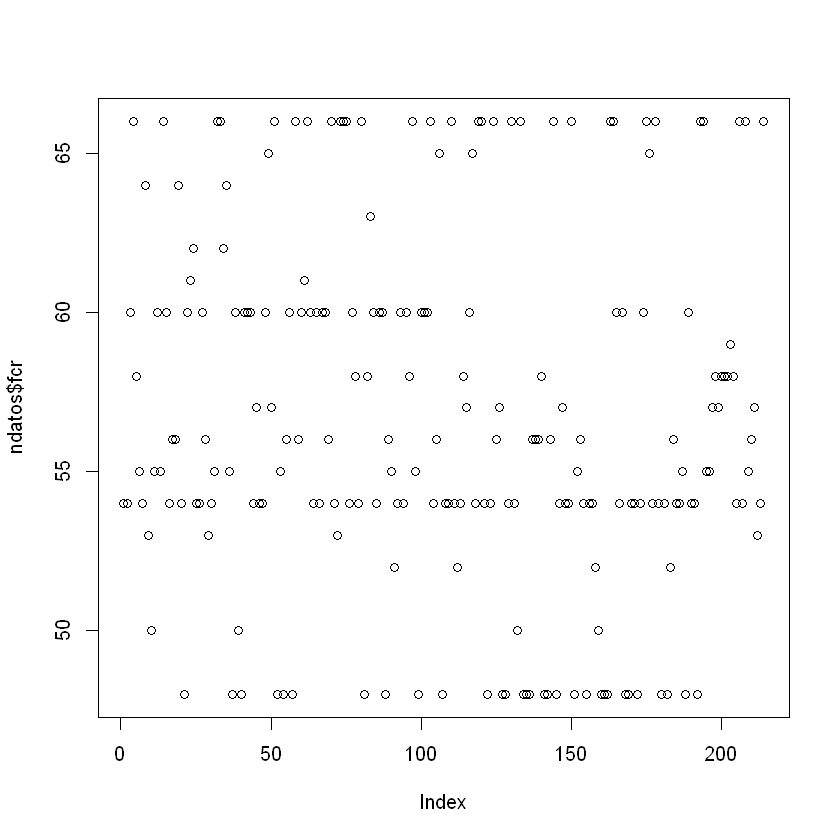

In [17]:
### todo bien ?????
datos<-cbind(pesoa,estaturaa,edada,fcc1,fcc2,fcc3,fcc4,fcr)
print(datos)
datos<-data.frame(datos)
detach(datam)
attach(datos)
###############################################################################
###############FCR
#### seleccionar solo los de los clusters correctos, medios y mayor comportamiento
ndatos <- datos[ which(datos$fcr>=li & datos$fcr<=ls), ] ### FCrep acostado
plot(ndatos$fcr)
fccrr<-cbind(fcc1,fcc2,fcc3,fcc4,fcr) ### Fc sentado  todas las mediciones
library(reshape)
plot(melt(fccrr)$value)
####))))))))))))))))))

In [18]:
str(datos)    # verificar la estructura de datos

'data.frame':	260 obs. of  8 variables:
 $ pesoa    : num  59.5 78 63 67 59 69 69 69 60 77 ...
 $ estaturaa: num  1.62 1.54 1.55 1.6 1.62 1.73 1.7 1.7 1.68 1.79 ...
 $ edada    : num  21 20 20 22 29 21 20 20 20 29 ...
 $ fcc1     : num  66 84 60 84 72 105 68 84 84 68 ...
 $ fcc2     : num  72 80 60 90 72 72 66 72 84 68 ...
 $ fcc3     : num  72 85 66 78 72 86 65 72 78 72 ...
 $ fcc4     : num  66 79 60 79 72 92 63 78 68 77 ...
 $ fcr      : num  54 83 54 60 66 72 58 55 54 64 ...


ERROR: Error in melt(fccrr): no se pudo encontrar la función "melt"


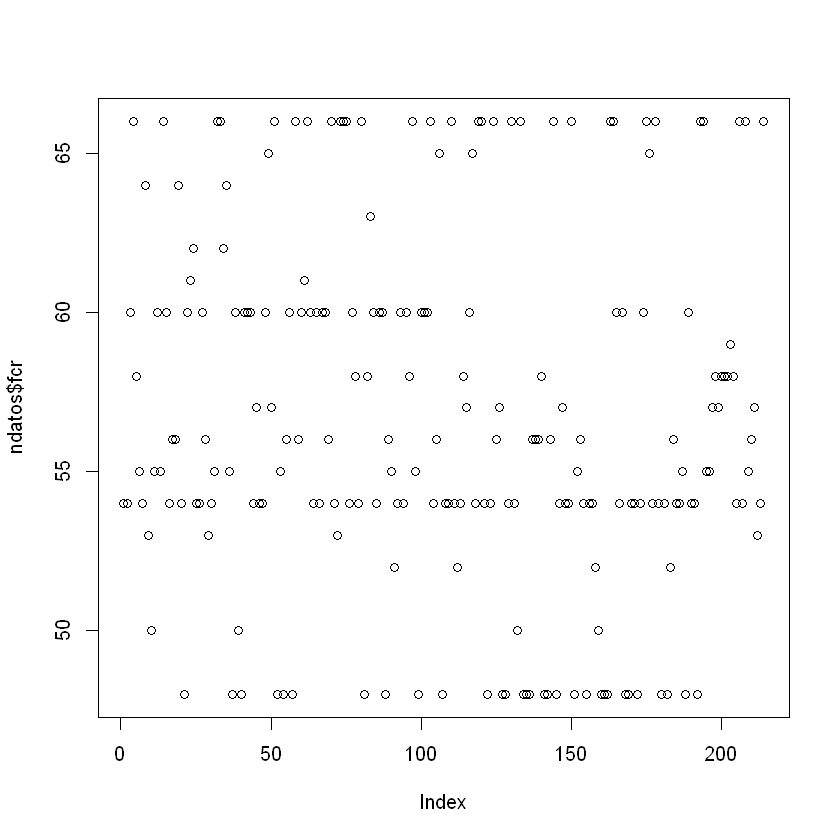

In [19]:
###############################################################################
###############FCR
#### seleccionar solo los de los clusters correctos, medios y mayor comportamiento
ndatos <- datos[ which(datos$fcr>=li & datos$fcr<=ls), ] ### FCrep acostado
plot(ndatos$fcr)
fccrr<-cbind(fcc1,fcc2,fcc3,fcc4,fcr) ### Fc sentado  todas las mediciones
plot(melt(fccrr)$value)
####))))))))))))))))))

#### IC de la media de las frecuencias cardiacaas en reposo en cama

In [20]:
data <- data.frame(xs = ndatos$fcr)

library(boot)
meanfun <- function(data, i){
  d <- data[i, ]
  return(mean(d))   
}
bo <- boot(data[, "xs", drop = FALSE], statistic=meanfun, R=10000)
boot.ci(bo, conf=0.95, type="bca")


Warning message:
"package 'boot' was built under R version 3.6.3"


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = bo, conf = 0.95, type = "bca")

Intervals : 
Level       BCa          
95%   (55.93, 57.43 )  
Calculations and Intervals on Original Scale

#### IC de la media de reposos en cama y sentados cada 20 minutos

In [22]:
library(reshape2)
ddd<-melt(fccrr)
data <- data.frame(xs = ddd$value)

library(boot)
meanfun <- function(data, i){
  d <- data[i, ]
  return(mean(d))   
}
bo <- boot(data[, "xs", drop = FALSE], statistic=meanfun, R=10000)
boot.ci(bo, conf=0.95, type="bca")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = bo, conf = 0.95, type = "bca")

Intervals : 
Level       BCa          
95%   (66.85, 68.12 )  
Calculations and Intervals on Original Scale

## 3> Modelo para FCreposo usando todas las variables


Call:
lm(formula = ndatos$fcr ~ ndatos$pesoa + ndatos$estaturaa + ndatos$edada + 
    ndatos$fcc1 + ndatos$fcc2 + ndatos$fcc3 + ndatos$fcc4, data = ndatos)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6473  -3.1207  -0.9865   3.5597  11.8070 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.207461   9.766047   4.219 3.67e-05 ***
ndatos$pesoa      0.049792   0.028260   1.762   0.0796 .  
ndatos$estaturaa  0.131208   5.456095   0.024   0.9808    
ndatos$edada     -0.008048   0.119438  -0.067   0.9463    
ndatos$fcc1       0.022820   0.042726   0.534   0.5938    
ndatos$fcc2       0.026848   0.044703   0.601   0.5488    
ndatos$fcc3       0.099144   0.038648   2.565   0.0110 *  
ndatos$fcc4       0.022876   0.036458   0.627   0.5310    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.535 on 206 degrees of freedom
Multiple R-squared:  0.05414,	Adjusted R-squared:  0.02199 
F-statis

[1] "Y = 41.2074612911177 + 0.0497915260835126 * ndatos$pesoa + 0.131207847257043 * ndatos$estaturaa + -0.00804788078102966 * ndatos$edada + 0.0228204407401835 * ndatos$fcc1 + 0.0268482819920085 * ndatos$fcc2 + 0.0991437568046707 * ndatos$fcc3 + 0.022876128426566 * ndatos$fcc4 + e"

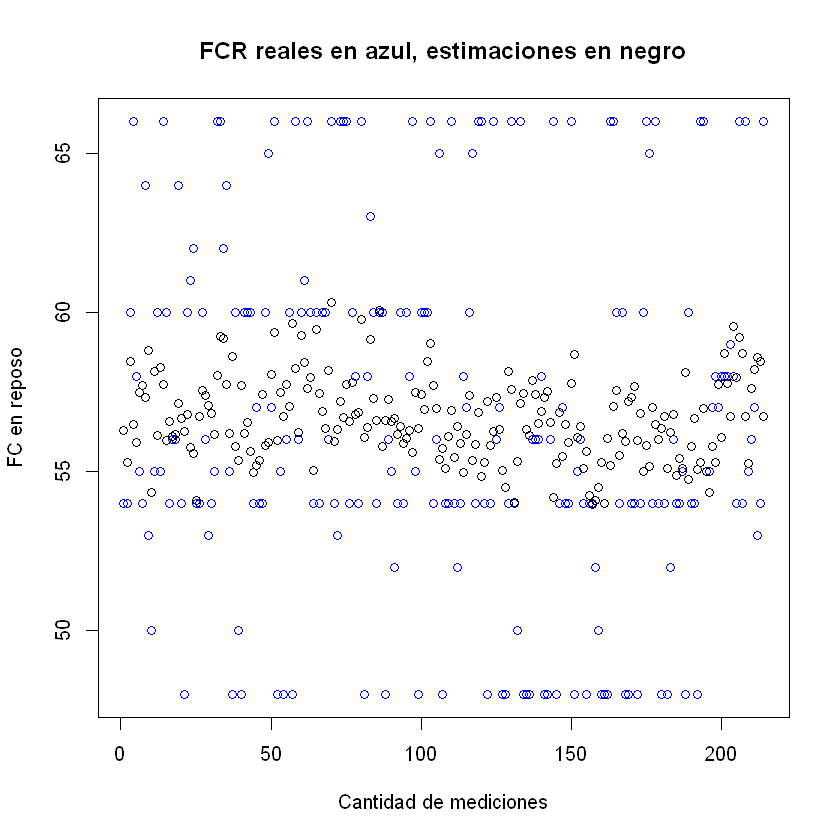

In [24]:
####(((((((((((((((((

fit<- lm(ndatos$fcr ~ ndatos$pesoa+ndatos$estaturaa+ndatos$edada+ndatos$fcc1+ndatos$fcc2+ndatos$fcc3+ndatos$fcc4,data=ndatos)
summary(fit)
plot(ndatos$fcr,col="blue",main="FCR reales en azul, estimaciones en negro",xlab="Cantidad de mediciones",ylab="FC en reposo")
points(fitted(fit))

# El modelo mostrarlo en forma conocida
cc <- fit$coefficients
(eqn <- paste("Y =", paste(cc[1], paste(cc[-1], names(cc[-1]), sep=" * ", collapse=" + "), sep=" + "), "+ e"))

# FCmax


Call:
lm(formula = fcm ~ ., data = fcm)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.582  -4.699  -1.835   5.163  20.933 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 275.0626   165.1762   1.665   0.1241  
edad         -6.7596     2.2535  -3.000   0.0121 *
peso          0.2529     1.3119   0.193   0.8507  
est           7.7888   125.0842   0.062   0.9515  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.15 on 11 degrees of freedom
Multiple R-squared:  0.6838,	Adjusted R-squared:  0.5976 
F-statistic: 7.931 on 3 and 11 DF,  p-value: 0.004289


[1] "Y = 275.062593305694 + -6.75960421323116 * edad + 0.252862969654903 * peso + 7.78881778515813 * est + e"

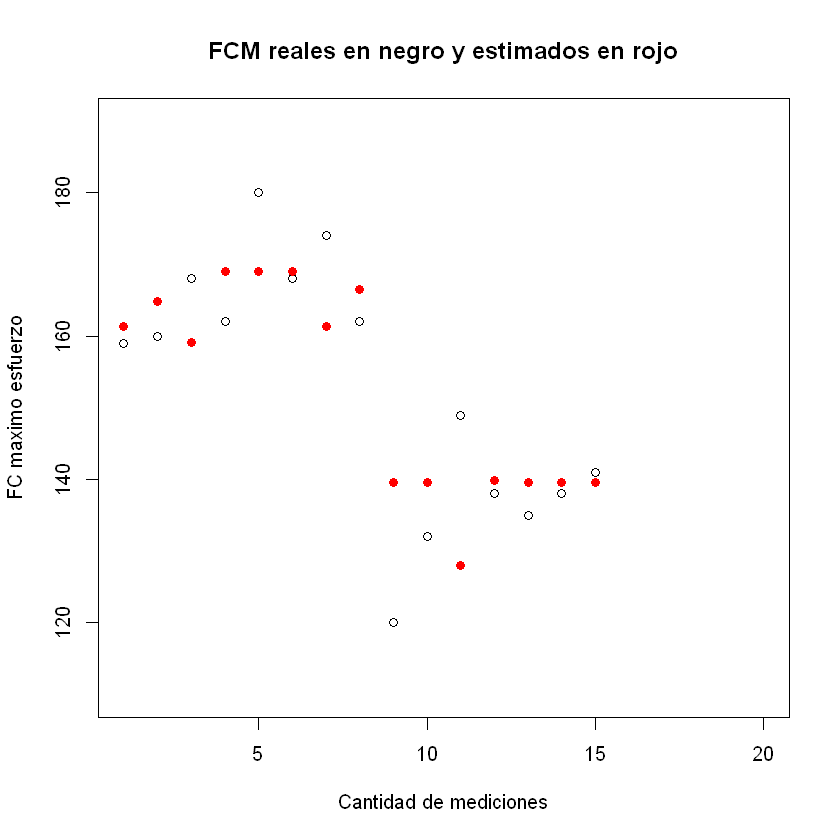

In [29]:
###############FCM
####### regression multiple
fcm<- read.csv(file.choose(),head=TRUE,sep=";")     #### Data2.csv
fit_fcm<-lm(fcm~.,data=fcm)
summary(fit_fcm)
yli<-min(fcm$fcm)-10
yls<-max(fcm$fcm)+10
xls<-max(length(fcm$fcm))+5

#plot(fcm$fcm,ylim=c(100,200),xlim=c(1,16))
plot(fcm$fcm,ylim=c(yli,yls),xlim=c(1,xls),main="FCM reales en negro y estimados en rojo",xlab="Cantidad de mediciones",ylab="FC maximo esfuerzo")
#fest<-275.0626-6.7596*fcm$edad+0.2529*fcm$peso+7.7888*fcm$est
fest<-fitted(fit_fcm)
points(fest,col="red",pch=19)


# El modelo mostrarlo en forma conocida
cc <- fit_fcm$coefficients
(eqn <- paste("Y =", paste(cc[1], paste(cc[-1], names(cc[-1]), sep=" * ", collapse=" + "), sep=" + "), "+ e"))

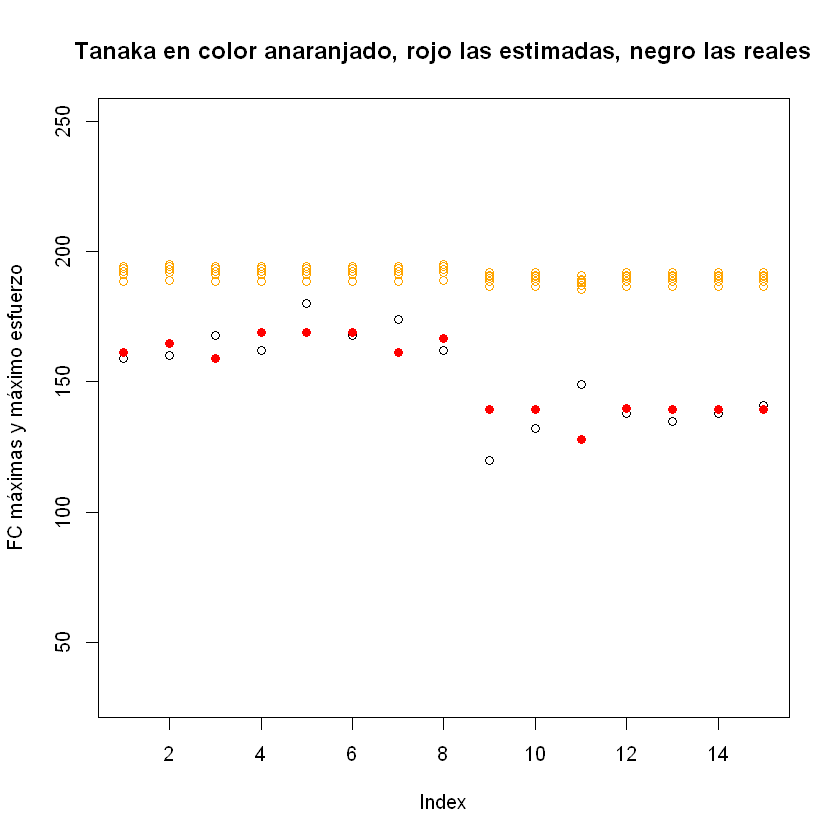

In [30]:
####### Comparar contra Tanaka       ################################################
### formulas de Tanaka ****    http://femede.es/documentos/OR_01_ecuaciones.pdf
##46 Tanaka, et al. (1997) 84 FCM = 199 – 0,5 (edad) 
##47 Tanaka, et al. (1997) 72 FCM = 207 – 0,60 (edad) 
##48 Tanaka, et al. (2001) 285 FCM = 211 - 0.8 (edad) 
##49 Tanaka, et al. (2001)  FCM = 207 - 0.7 (edad) 
##50 Tanaka, et al. (2001) 229 FCM = 206 - 0.7 (edad) 
##51 Tanaka, et al. (2001) 18.712 FCM = 208,75 – 0,73 (edad) 

plot(fcm$fcm,ylim=c(30,250),main="Tanaka en color anaranjado, rojo las estimadas, negro las reales",ylab="FC máximas y máximo esfuerzo")
points(fest,col="red",pch=19)
t1<-199-0.5*fcm$edad
t2<-207-0.60*fcm$edad
t3<-211-0.8*fcm$edad
t4<-207-0.7*fcm$edad
t5<-206-0.7*fcm$edad
t6<-208.75-0.73*fcm$edad

points(t1,col="orange")
points(t2,col="orange")
points(t3,col="orange")
points(t4,col="orange")
points(t5,col="orange")
points(t6,col="orange")


In [31]:
#################################################################################

r1<-numeric()
r2<-numeric()
 uno<-numeric()
 dos<-numeric()
 tres<-numeric()
 cuatro<-numeric()
 cinco<-numeric()
 seis<-numeric()
 siete<-numeric()
 ocho<-numeric()
 nueve<- numeric()
 diez<- numeric()
 once<- numeric()
 doce<- numeric()
 trece<- numeric()
 catorce<-numeric()
 quince<-numeric()
 dseis<- numeric()
 dsiete<- numeric()
 docho<-  numeric()
 dnueve<- numeric()
 veinte<- numeric()
 vuno<- numeric()
 vdos<- numeric()
 vtres<- numeric()
 vcuatro<- numeric()
 vcinco<- numeric()
 pps=data.frame()
 
for (i in 1:length(datos$fcr))    {
 fz<-275.0626-6.7596*datos$edada[i]+0.2529*datos$pesoa[i]+7.7888*datos$estaturaa[i]
 uno<-211-0.922*datos$edada[i]
 dos<-217-0.845*datos$edada[i]
 tres<-217-0.845*datos$edada[i]
 cuatro<-197-0.556*datos$edad[i]
 cinco<-205-0.64*datos$edad[i]
 seis<-207-0.64*datos$edad[i]
 siete<-199-0.63*datos$edad[i]
 ocho<-206-0.597*datos$edad[i]
 nueve<- 227-1.067*datos$edad[i]
 diez<- 205.8-0.685*datos$edad[i]
 once<- 210-0.65*datos$edad[i]
 doce<- 205-0.41*datos$edad[i]
 trece<- 198-0.41*datos$edad[i]
 catorce<-200-0.72*datos$edad[i]
 quince<-214-1.02*datos$edad[i]
 dseis<- 212-0.77*datos$edad[i]
 dsiete<- 216-0.88*datos$edad[i]
 docho<-  211-0.8*datos$edad[i]
 dnueve<- 207-0.7*datos$edad[i]
 veinte<- 206-0.7*datos$edad[i]
 vuno<- 208.75-0.73*datos$edad[i]
 vdos<- 209-0.7*datos$edad[i]
 vtres<- 214-0.8*datos$edad[i]
 vcuatro<- 220-datos$edad[i]
 vcinco<- 210-datos$edad[i]
 
 uno<-c(uno)
 dos<-c(dos)
 tres<-c(tres)
 cuatro<-c(cuatro)
 cinco<-c(cinco)
 seis<-c(seis)
 siete<- c(siete)
 ocho<- c(ocho)
 nueve<- c(nueve)
 diez<- c(diez)
 once<- c(once)
 doce<- c(doce)
 trece<- c(trece)
 catorce<-c(catorce)
 quince<- c(quince)
 dseis<- c(dseis)
 dsiete<- c(dsiete)
 docho<-  c(docho)
 dnueve<- c(dnueve)
 veinte<- c(veinte)
 vuno<- c(vuno)
 vdos<- c(vdos)
 vtres<- c(vtres)
 vcuatro<- c(vcuatro)
 vcinco<- c(vcinco)
 
 pp<-c(uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dseis,dsiete,docho,dnueve,veinte,vuno,vdos,vtres,vcuatro,vcinco)
 
 pps<-rbind(pps,t(pp))
 
 if (fz>140){
    r1<-rbind(r1,fz)
 }else{
    r2<-rbind(r2,fz)
    
 }
 
}



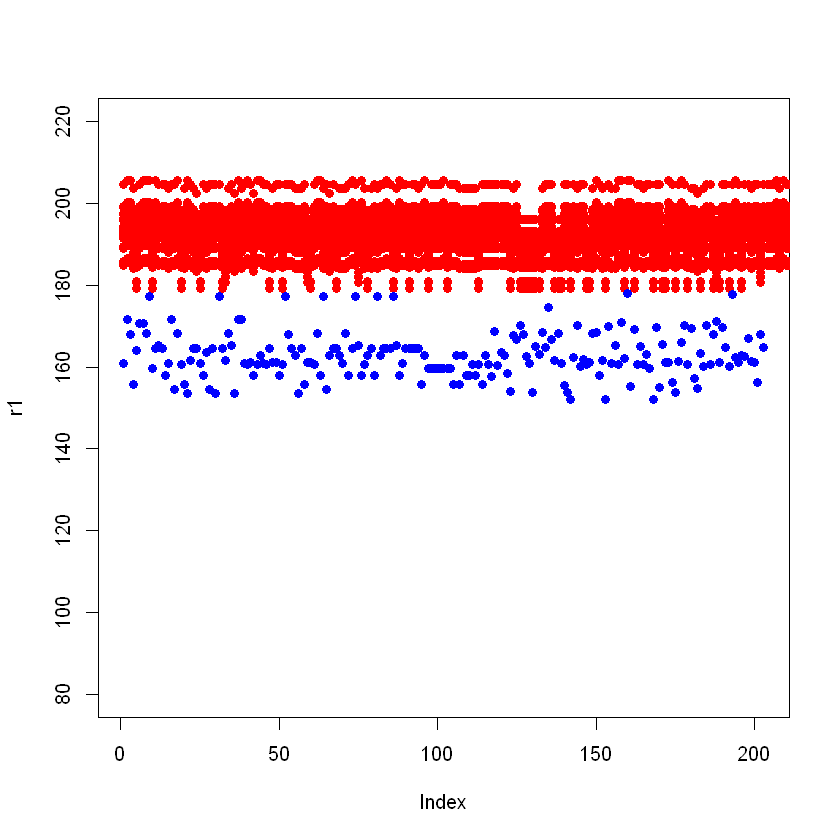

In [32]:
##### estimadas maximas contra las 25 ecuaciones de FCM

plot(r1,ylim=c(80,220))
points(pps$V1,col="red",pch=19)
points(pps$V2,col="red",pch=19)
points(pps$V3,col="red",pch=19)
points(pps$V4,col="red",pch=19)
points(pps$V5,col="red",pch=19)
points(pps$V6,col="red",pch=19)
points(pps$V7,col="red",pch=19)
points(pps$V8,col="red",pch=19)
points(pps$V9,col="red",pch=19)
points(pps$V10,col="red",pch=19)
points(pps$V11,col="red",pch=19)
points(pps$V12,col="red",pch=19)
points(pps$V13,col="red",pch=19)
points(pps$V14,col="red",pch=19)
points(pps$V15,col="red",pch=19)
points(pps$V16,col="red",pch=19)
points(pps$V17,col="red",pch=19)
points(pps$V18,col="red",pch=19)
points(pps$V19,col="red",pch=19)
points(pps$V20,col="red",pch=19)
points(pps$V21,col="red",pch=19)
points(pps$V22,col="red",pch=19)
points(pps$V23,col="red",pch=19)
points(pps$V24,col="red",pch=19)
points(pps$V25,col="red",pch=19)
points(r1,col="blue",pch=19)




dev.new()
plot(r2,ylim=c(80,220))
points(pps$V1,col="red",pch=19)
points(pps$V2,col="red",pch=19)
points(pps$V3,col="red",pch=19)
points(pps$V4,col="red",pch=19)
points(pps$V5,col="red",pch=19)
points(pps$V6,col="red",pch=19)
points(pps$V7,col="red",pch=19)
points(pps$V8,col="red",pch=19)
points(pps$V9,col="red",pch=19)
points(pps$V10,col="red",pch=19)
points(pps$V11,col="red",pch=19)
points(pps$V12,col="red",pch=19)
points(pps$V13,col="red",pch=19)
points(pps$V14,col="red",pch=19)
points(pps$V15,col="red",pch=19)
points(pps$V16,col="red",pch=19)
points(pps$V17,col="red",pch=19)
points(pps$V18,col="red",pch=19)
points(pps$V19,col="red",pch=19)
points(pps$V20,col="red",pch=19)
points(pps$V21,col="red",pch=19)
points(pps$V22,col="red",pch=19)
points(pps$V23,col="red",pch=19)
points(pps$V24,col="red",pch=19)
points(pps$V25,col="red",pch=19)
points(r2,col="blue",pch=19)


In [33]:
##### formulas mHR            http://www.medigraphic.com/pdfs/cardio/h-2016/h164b.pdf

#1 Astrang14 211-0.922* Year
#2 Bruce (1974)15 210-0.662* Year
#3 Cooper16 217-0.845* Year
#4 Ellestad16 197-0.556* Year
#5 Fernhall et al. (2001)17 205-0.64* Year
#6 Froelicher y Myers (2000)16 207-0.64* Year
#7 Graettinger et al. (1995)18 199-0.63* Year
#8 Hossack y Bruce (1982)19 206-0.597* Year
#9 Hossack y Bruce (1982)19 227-1.067* Year
#10 Inbar et al. (1994)20 205.8-0.685* Year
#11 Jones (1985)21 210-0.65* Year
#12 Lester (1968) Trained22 205-0.41* Year
#13 Lester (1968) Untrained22 198-0.41* Year
#14 Morris16 200-0.72* Year
#15 Rodeheff er et al (1984)23 214-1.02* Year
#16 Robinson (1938)16 212-0.77* Year
#17 Sheffi eld et al. (1978)24 216-0.88* Year
#18 Tanaka et al. (2001)9 211-0.8* Year
#19 Tanaka et al. (2001)9 207-0.7* Year
#20 Tanaka et al. (2001)9 206-0.7* Year
#21 Tanaka et al. (2001)9 208.75-0.73* Year
#22 Whaley et al (1992)25 209-0.7* Year
#23 Whaley et al (1992)25 214-0.8* Year
#24 220-Year
#25 210-Year


In [34]:
#### ((((((((((((((((
alpha<-0.05 # nivel alpha


data <- data.frame(xs = r1)

library(boot)
meanfun <- function(data, i){
  d <- data[i, ]
  return(mean(d))   
}
bo1 <- boot(data[, "xs", drop = FALSE], statistic=meanfun, R=10000)
boot.ci(bo1, conf=0.95, type="bca")



# R is number of replications
#mean_results <- boot(r1, boot_mean, R = 10000)   #### mayores de 140   (161.1-162.7)
#mean_r1 <- boot(r2,boot_mean,R=10000)### menores de 140      (110.4-113.6)

# Load broom to get a tidy dataframe as output.
#library(broom)
#tidy(mean_results)
#tidy(mean_r1)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = bo1, conf = 0.95, type = "bca")

Intervals : 
Level       BCa          
95%   (162.2, 163.7 )  
Calculations and Intervals on Original Scale

In [35]:
data <- data.frame(xs = r2)

library(boot)
meanfun <- function(data, i){
  d <- data[i, ]
  return(mean(d))   
}
bo2 <- boot(data[, "xs", drop = FALSE], statistic=meanfun, R=10000)
boot.ci(bo2, conf=0.95, type="bca")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = bo2, conf = 0.95, type = "bca")

Intervals : 
Level       BCa          
95%   (109.9, 113.2 )  
Calculations and Intervals on Original Scale

## sin separar a 140 el promedio sería

In [36]:
data <- data.frame(xs = c(r1,r2))

library(boot)
meanfun <- function(data, i){
  d <- data[i, ]
  return(mean(d))   
}
bo <- boot(data[, "xs", drop = FALSE], statistic=meanfun, R=10000)
boot.ci(bo, conf=0.95, type="bca")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = bo, conf = 0.95, type = "bca")

Intervals : 
Level       BCa          
95%   (148.7, 154.0 )  
Calculations and Intervals on Original Scale